In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
dt = pd.read_csv("/content/drive/MyDrive/.Tugas Akhir/TA2_coding/New folder/csv_all_normalisasi/4.csv",sep=";")

In [ ]:
dt

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
0,1.8700,0.000,1,-5.6800,37.200,1
1,1.7025,-5.025,1,-5.3475,37.875,1
2,1.5350,-10.050,1,-5.0150,38.550,1
3,1.3675,-15.075,1,-4.6825,39.225,1
4,1.2000,-20.100,1,-4.3500,39.900,1
...,...,...,...,...,...,...
15852,5.0160,-5.892,4,-6.1008,-12.852,4
15853,5.0308,1.464,4,-6.1924,-8.979,4
15854,5.0372,1.176,4,-5.9416,1.614,4
15855,5.0436,0.888,4,-5.6908,12.207,4


In [ ]:
# Drop the first row
#dt.drop(index=0, inplace=True)

In [ ]:
dt

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
0,1.8700,0.000,1,-5.6800,37.200,1
1,1.7025,-5.025,1,-5.3475,37.875,1
2,1.5350,-10.050,1,-5.0150,38.550,1
3,1.3675,-15.075,1,-4.6825,39.225,1
4,1.2000,-20.100,1,-4.3500,39.900,1
...,...,...,...,...,...,...
15852,5.0160,-5.892,4,-6.1008,-12.852,4
15853,5.0308,1.464,4,-6.1924,-8.979,4
15854,5.0372,1.176,4,-5.9416,1.614,4
15855,5.0436,0.888,4,-5.6908,12.207,4


In [ ]:
# Extract features and target
df = dt[['RIGHT_ANKLE_DEGREE1', 'RIGHT_ANKLE_VEL1', 'RIGHT_FASE1', 'LEFT_ANKLE_DEGREE1', 'LEFT_ANKLE_VEL1', 'LEFT_FASE1']]

In [ ]:
df

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
0,1.8700,0.000,1,-5.6800,37.200,1
1,1.7025,-5.025,1,-5.3475,37.875,1
2,1.5350,-10.050,1,-5.0150,38.550,1
3,1.3675,-15.075,1,-4.6825,39.225,1
4,1.2000,-20.100,1,-4.3500,39.900,1
...,...,...,...,...,...,...
15852,5.0160,-5.892,4,-6.1008,-12.852,4
15853,5.0308,1.464,4,-6.1924,-8.979,4
15854,5.0372,1.176,4,-5.9416,1.614,4
15855,5.0436,0.888,4,-5.6908,12.207,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RIGHT_ANKLE_DEGREE1  15857 non-null  float64
 1   RIGHT_ANKLE_VEL1     15857 non-null  float64
 2   RIGHT_FASE1          15857 non-null  int64  
 3   LEFT_ANKLE_DEGREE1   15857 non-null  float64
 4   LEFT_ANKLE_VEL1      15857 non-null  float64
 5   LEFT_FASE1           15857 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 743.4 KB


In [ ]:
print("data shape : ", df.shape)

data shape :  (15857, 6)


In [ ]:
df.describe()

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
count,15857.000000,15857.000000,15857.000000,15857.000000,15857.000000,15857.000000
mean,-1.035472,-1.266787,2.367535,-0.344842,-1.206573,2.513969
std,6.681623,52.577505,1.142695,5.421566,97.645804,1.169188
min,-21.398000,-453.566667,1.000000,-33.656000,-2127.530300,1.000000
25%,-5.763600,-32.460000,1.000000,-3.461000,-21.900000,1.000000
50%,-1.637600,-1.260000,2.000000,-0.380000,2.592000,2.000000
75%,2.980000,28.161000,3.000000,2.750000,23.604000,4.000000
max,41.370000,608.760000,4.000000,71.833200,2768.426359,4.000000


In [ ]:
#df.RIGHT.value_counts()

In [ ]:
#df.isnull().sum()

In [ ]:
df.corr()

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1,RIGHT_FASE1,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1,LEFT_FASE1
RIGHT_ANKLE_DEGREE1,1.000000,0.113795,-0.140619,-0.170564,-0.005935,-0.159701
RIGHT_ANKLE_VEL1,0.113795,1.000000,0.280210,0.012037,-0.016825,0.272706
RIGHT_FASE1,-0.140619,0.280210,1.000000,-0.106897,-0.137070,0.883949
LEFT_ANKLE_DEGREE1,-0.170564,0.012037,-0.106897,1.000000,0.282287,-0.044217
LEFT_ANKLE_VEL1,-0.005935,-0.016825,-0.137070,0.282287,1.000000,-0.136523
LEFT_FASE1,-0.159701,0.272706,0.883949,-0.044217,-0.136523,1.000000


<Axes: >

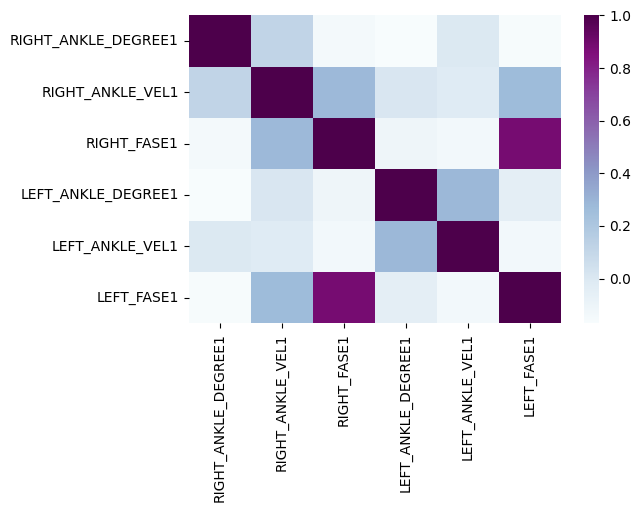

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap="BuPu")

In [ ]:
# Extract features and target
x = df[['RIGHT_ANKLE_DEGREE1','RIGHT_ANKLE_VEL1']]
y = df[['RIGHT_FASE1']]

print("x = ",x.shape)
print("y = ",y.shape)

x =  (15857, 2)
y =  (15857, 1)


In [ ]:
x

,RIGHT_ANKLE_DEGREE1,RIGHT_ANKLE_VEL1
0,1.8700,0.000
1,1.7025,-5.025
2,1.5350,-10.050
3,1.3675,-15.075
4,1.2000,-20.100
...,...,...
15852,5.0160,-5.892
15853,5.0308,1.464
15854,5.0372,1.176
15855,5.0436,0.888


In [ ]:
y

,RIGHT_FASE1
0,1
1,1
2,1
3,1
4,1
...,...
15852,4
15853,4
15854,4
15855,4


In [ ]:
# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Fit SVM model
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
# Make predictions
y_pred = clf.predict(x_test)

In [ ]:
# Calculate accuracy
CLF_acc = accuracy_score(y_pred, y_test)
print("Accuracy:", CLF_acc)

Accuracy: 0.5349936948297604


In [ ]:
# Plot the decision boundary
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
#df.RIGHT_FASE.value_counts()

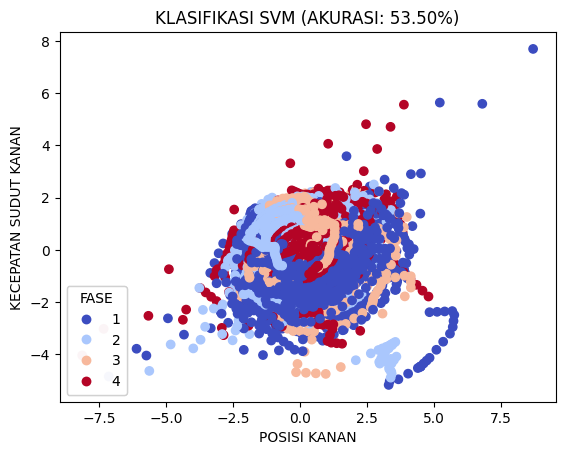

accuracy: 53.50%


In [ ]:
# Plot data points
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y['RIGHT_FASE1'], cmap=plt.cm.coolwarm)
plt.xlabel('POSISI KANAN')
plt.ylabel('KECEPATAN SUDUT KANAN')
plt.title('KLASIFIKASI SVM (AKURASI: {:.2f}%)'.format(CLF_acc*100))
# Add legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="FASE")
plt.gca().add_artist(legend1)

plt.show()
print("accuracy: {:.2f}%".format(CLF_acc * 100))

In [ ]:
x1 = df[['LEFT_ANKLE_DEGREE1','LEFT_ANKLE_VEL1']]
y1 = df[['LEFT_FASE1']]

print("x1 = ",x1.shape)
print("y1 = ",y1.shape)

x1 =  (15857, 2)
y1 =  (15857, 1)


In [ ]:
x1

,LEFT_ANKLE_DEGREE1,LEFT_ANKLE_VEL1
0,-5.6800,37.200
1,-5.3475,37.875
2,-5.0150,38.550
3,-4.6825,39.225
4,-4.3500,39.900
...,...,...
15852,-6.1008,-12.852
15853,-6.1924,-8.979
15854,-5.9416,1.614
15855,-5.6908,12.207


In [ ]:
y1

,LEFT_FASE1
0,1
1,1
2,1
3,1
4,1
...,...
15852,4
15853,4
15854,4
15855,4


In [ ]:
# Standardize features
scaler1 = StandardScaler()
x_scaled1 = scaler1.fit_transform(x1)

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_scaled1, y1, test_size=0.2, random_state=42)

In [ ]:
# Fit SVM model
clf1 = SVC(kernel='linear')
clf1.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
# Make predictions
y1_pred = clf1.predict(x1_test)

In [ ]:
# Calculate accuracy
CLF_acc1 = accuracy_score(y1_pred, y1_test)
print("Accuracy:", CLF_acc1)

Accuracy: 0.44861286254728877


In [ ]:
# Plot the decision boundary
pca1 = PCA(n_components=2)
x1_pca = pca1.fit_transform(x_scaled1)

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
#df.LEFT_FASE.value_counts()

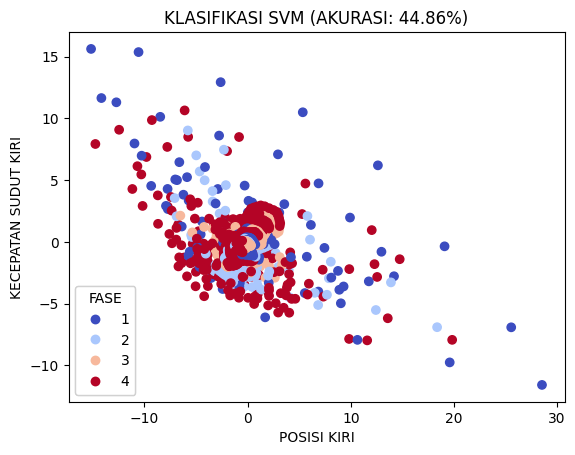

accuracy: 44.86%


In [ ]:
# Plot data points
scatter1 = plt.scatter(x1_pca[:, 0], x1_pca[:, 1], c=y1['LEFT_FASE1'], cmap=plt.cm.coolwarm)
plt.xlabel('POSISI KIRI')
plt.ylabel('KECEPATAN SUDUT KIRI')
plt.title('KLASIFIKASI SVM (AKURASI: {:.2f}%)'.format(CLF_acc1*100))

# Add legend
legend1 = plt.legend(*scatter1.legend_elements(),
                    loc="lower left", title="FASE")
plt.gca().add_artist(legend1)

plt.show()
print("accuracy: {:.2f}%".format(CLF_acc1 * 100))

In [ ]:
RIGHT_ANKLE_DEGREE = df[['RIGHT_ANKLE_DEGREE1']]
RIGHT_ANKLE_VELOCITY = df[['RIGHT_ANKLE_VEL1']]
RIGHT_PHASE = df[['RIGHT_FASE1']]

LEFT_ANKLE_DEGREE = df[['LEFT_ANKLE_DEGREE1']]
LEFT_ANKLE_VELOCITY = df[['LEFT_ANKLE_VEL1']]
LEFT_PHASE = df[['LEFT_FASE1']]

In [ ]:
def perform_regression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r_squared = r2_score(y, y_pred)
    return model, r_squared

def calculate_adjusted_r_squared(r_squared, n, k):
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adjusted_r_squared

# Function to perform regression and calculate adjusted R-squared
def perform_regression_with_adjusted_r_squared(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    n = len(y)
    k = x.shape[1]
    r_squared = r2_score(y, y_pred)
    adjusted_r_squared = calculate_adjusted_r_squared(r_squared, n, k)
    return model, r_squared, adjusted_r_squared

In [ ]:
# 1. RIGHT_ANKLE_DEGREE vs RIGHT_PHASE
model_1, r_squared_1 = perform_regression(RIGHT_ANKLE_DEGREE, RIGHT_PHASE)
print("1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:")
print("Coefficients:", model_1.coef_)
print("Intercept:", model_1.intercept_)
print("R-squared: {:.6f}".format(r_squared_1))
print()

# 2. RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
model_2, r_squared_2 = perform_regression(RIGHT_ANKLE_VELOCITY, RIGHT_PHASE)
print("2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_2.coef_)
print("Intercept:", model_2.intercept_)
print("R-squared: {:.6f}".format(r_squared_2))
print()

# 3. RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
x_combined_right = np.hstack((RIGHT_ANKLE_DEGREE, RIGHT_ANKLE_VELOCITY))
model_3, r_squared_3, adjusted_r_squared_3 = perform_regression_with_adjusted_r_squared(x_combined_right, RIGHT_PHASE)
print("3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_3.coef_)
print("Intercept:", model_3.intercept_)
print("R-squared: {:.6f}".format(r_squared_3))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_3))
print()

# 4. LEFT_ANKLE_DEGREE vs LEFT_PHASE
model_4, r_squared_4 = perform_regression(LEFT_ANKLE_DEGREE, LEFT_PHASE)
print("4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:")
print("Coefficients:", model_4.coef_)
print("Intercept:", model_4.intercept_)
print("R-squared: {:.6f}".format(r_squared_4))
print()

# 5. LEFT_ANKLE_VELOCITY vs LEFT_PHASE
model_5, r_squared_5 = perform_regression(LEFT_ANKLE_VELOCITY, LEFT_PHASE)
print("5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_5.coef_)
print("Intercept:", model_5.intercept_)
print("R-squared: {:.6f}".format(r_squared_5))
print()

# 6. LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE
x_combined_left = np.hstack((LEFT_ANKLE_DEGREE, LEFT_ANKLE_VELOCITY))
model_6, r_squared_6, adjusted_r_squared_6 = perform_regression_with_adjusted_r_squared(x_combined_left, LEFT_PHASE)
print("6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_6.coef_)
print("Intercept:", model_6.intercept_)
print("R-squared: {:.6f}".format(r_squared_6))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_6))
print()

print("accuracy RIGHT SVM: {:.2f}%".format(CLF_acc * 100))
print("accuracy LEFT SVM: {:.2f}%".format(CLF_acc1 * 100))

1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:
Coefficients: [[-0.02404873]]
Intercept: [2.34263305]
R-squared: 0.019774

2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[0.00608995]]
Intercept: [2.37524951]
R-squared: 0.078518

3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[-0.029889    0.00652218]]
Intercept: [2.34484783]
R-squared: 0.108666
Adjusted R-squared: 0.108554

4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:
Coefficients: [[-0.00953572]]
Intercept: [2.51068027]
R-squared: 0.001955

5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[-0.0016347]]
Intercept: [2.51199621]
R-squared: 0.018639

6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[-0.00133066 -0.00161384]]
Intercept: [2.51156251]
R-squared: 0.018674
Adjusted R-squared: 0.018550

accuracy RIGHT SVM: 53.50%
accuracy LEFT SVM: 44.86%


1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:
Coefficients: [[-0.02404873]]
Intercept: [2.34263305]
R-squared: 0.019774


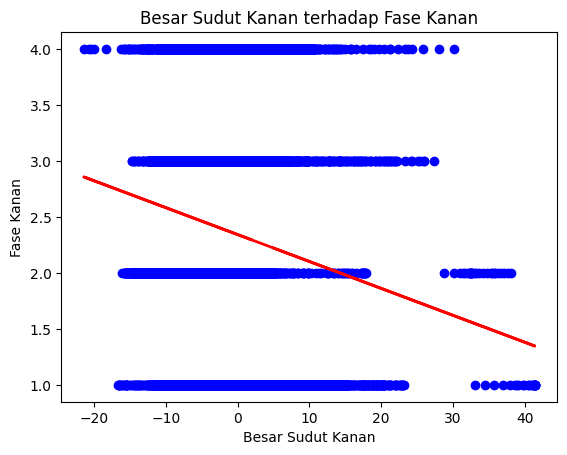


2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[0.00608995]]
Intercept: [2.37524951]
R-squared: 0.078518


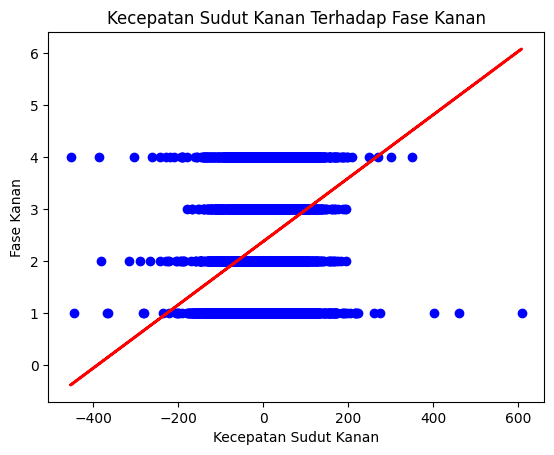


3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:
Coefficients: [[-0.029889    0.00652218]]
Intercept: [2.34484783]
R-squared: 0.108666
Adjusted R-squared: 0.108554



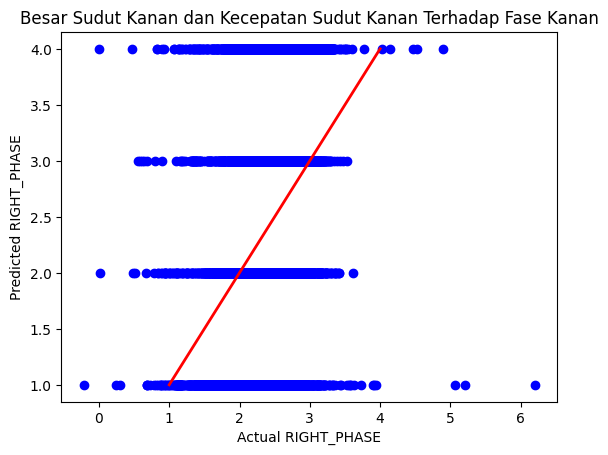

4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:
Coefficients: [[-0.00953572]]
Intercept: [2.51068027]
R-squared: 0.001955


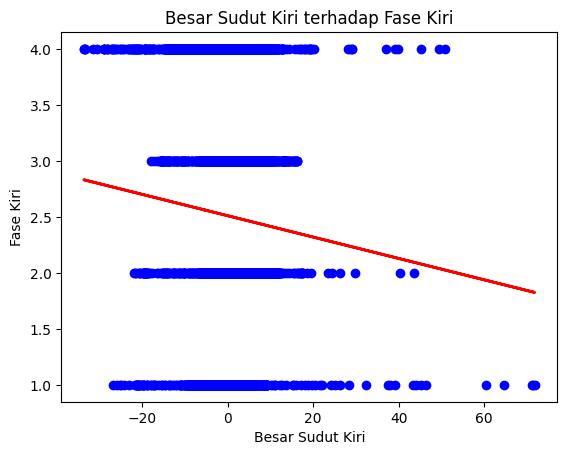


5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[-0.0016347]]
Intercept: [2.51199621]
R-squared: 0.018639


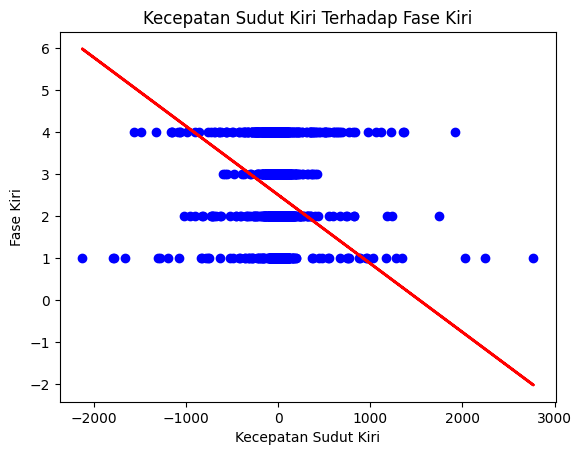


6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:
Coefficients: [[-0.00133066 -0.00161384]]
Intercept: [2.51156251]
R-squared: 0.018674
Adjusted R-squared: 0.018550



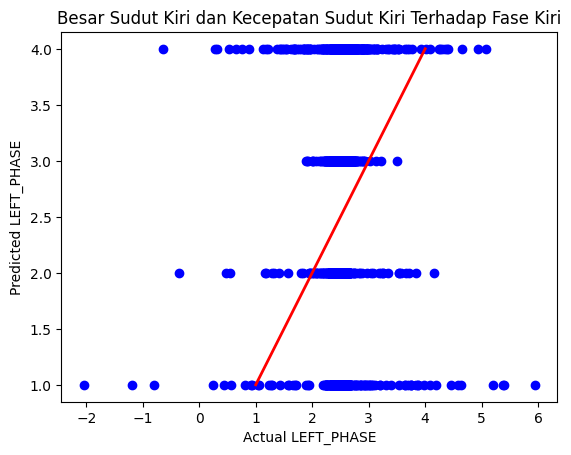

Accuracy RIGHT SVM: 85.00%
Accuracy LEFT SVM: 83.00%


In [ ]:
RIGHT_ANKLE_DEGREE = df[['RIGHT_ANKLE_DEGREE1']]
RIGHT_ANKLE_VELOCITY = df[['RIGHT_ANKLE_VEL1']]
RIGHT_PHASE = df[['RIGHT_FASE1']]

LEFT_ANKLE_DEGREE = df[['LEFT_ANKLE_DEGREE1']]
LEFT_ANKLE_VELOCITY = df[['LEFT_ANKLE_VEL1']]
LEFT_PHASE = df[['LEFT_FASE1']]

def perform_regression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r_squared = r2_score(y, y_pred)
    return model, r_squared, y_pred

def calculate_adjusted_r_squared(r_squared, n, k):
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    return adjusted_r_squared

# Function to perform regression and calculate adjusted R-squared
def perform_regression_with_adjusted_r_squared(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    n = len(y)
    k = x.shape[1]
    r_squared = r2_score(y, y_pred)
    adjusted_r_squared = calculate_adjusted_r_squared(r_squared, n, k)
    return model, r_squared, adjusted_r_squared, y_pred

# 1. RIGHT_ANKLE_DEGREE vs RIGHT_PHASE
model_1, r_squared_1, y_pred_1 = perform_regression(RIGHT_ANKLE_DEGREE, RIGHT_PHASE)
print("1. Regression Values for RIGHT_ANKLE_DEGREE vs RIGHT_PHASE:")
print("Coefficients:", model_1.coef_)
print("Intercept:", model_1.intercept_)
print("R-squared: {:.6f}".format(r_squared_1))
plt.scatter(RIGHT_ANKLE_DEGREE, RIGHT_PHASE, color='blue')
plt.plot(RIGHT_ANKLE_DEGREE, y_pred_1, color='red', linewidth=2)
plt.title("Besar Sudut Kanan terhadap Fase Kanan")
plt.xlabel('Besar Sudut Kanan')
plt.ylabel('Fase Kanan')
plt.show()
print()

# 2. RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
model_2, r_squared_2, y_pred_2 = perform_regression(RIGHT_ANKLE_VELOCITY, RIGHT_PHASE)
print("2. Regression Values for RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_2.coef_)
print("Intercept:", model_2.intercept_)
print("R-squared: {:.6f}".format(r_squared_2))

plt.scatter(RIGHT_ANKLE_VELOCITY, RIGHT_PHASE, color='blue')
plt.plot(RIGHT_ANKLE_VELOCITY, y_pred_2, color='red', linewidth=2)
plt.title("Kecepatan Sudut Kanan Terhadap Fase Kanan")
plt.xlabel('Kecepatan Sudut Kanan')
plt.ylabel('Fase Kanan')
plt.show()
print()

# 3. RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE
x_combined_right = np.hstack((RIGHT_ANKLE_DEGREE, RIGHT_ANKLE_VELOCITY))
model_3, r_squared_3, adjusted_r_squared_3, y_pred_3 = perform_regression_with_adjusted_r_squared(x_combined_right, RIGHT_PHASE)
print("3. Regression Values for RIGHT_ANKLE_DEGREE & RIGHT_ANKLE_VELOCITY vs RIGHT_PHASE:")
print("Coefficients:", model_3.coef_)
print("Intercept:", model_3.intercept_)
print("R-squared: {:.6f}".format(r_squared_3))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_3))
print()

# For combined plots, it's a bit more complex to visualize. You can plot predicted vs actual values:
plt.scatter(y_pred_3, RIGHT_PHASE, color='blue')
plt.plot(RIGHT_PHASE, RIGHT_PHASE, color='red', linewidth=2)  # Line y=x for reference
plt.title("Besar Sudut Kanan dan Kecepatan Sudut Kanan Terhadap Fase Kanan")
plt.xlabel('Actual RIGHT_PHASE')
plt.ylabel('Predicted RIGHT_PHASE')
plt.show()

# 4. LEFT_ANKLE_DEGREE vs LEFT_PHASE
model_4, r_squared_4, y_pred_4 = perform_regression(LEFT_ANKLE_DEGREE, LEFT_PHASE)
print("4. Regression Values for LEFT_ANKLE_DEGREE vs LEFT_PHASE:")
print("Coefficients:", model_4.coef_)
print("Intercept:", model_4.intercept_)
print("R-squared: {:.6f}".format(r_squared_4))

plt.scatter(LEFT_ANKLE_DEGREE, LEFT_PHASE, color='blue')
plt.plot(LEFT_ANKLE_DEGREE, y_pred_4, color='red', linewidth=2)
plt.title("Besar Sudut Kiri terhadap Fase Kiri")
plt.xlabel('Besar Sudut Kiri')
plt.ylabel('Fase Kiri')
plt.show()
print()

# 5. LEFT_ANKLE_VELOCITY vs LEFT_PHASE
model_5, r_squared_5, y_pred_5 = perform_regression(LEFT_ANKLE_VELOCITY, LEFT_PHASE)
print("5. Regression Values for LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_5.coef_)
print("Intercept:", model_5.intercept_)
print("R-squared: {:.6f}".format(r_squared_5))

plt.scatter(LEFT_ANKLE_VELOCITY, RIGHT_PHASE, color='blue')
plt.plot(LEFT_ANKLE_VELOCITY, y_pred_5, color='red', linewidth=2)
plt.title("Kecepatan Sudut Kiri Terhadap Fase Kiri")
plt.xlabel('Kecepatan Sudut Kiri')
plt.ylabel('Fase Kiri')
plt.show()
print()

# 6. LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE
x_combined_left = np.hstack((LEFT_ANKLE_DEGREE, LEFT_ANKLE_VELOCITY))
model_6, r_squared_6, adjusted_r_squared_6, y_pred_6 = perform_regression_with_adjusted_r_squared(x_combined_left, LEFT_PHASE)
print("6. Regression Values for LEFT_ANKLE_DEGREE & LEFT_ANKLE_VELOCITY vs LEFT_PHASE:")
print("Coefficients:", model_6.coef_)
print("Intercept:", model_6.intercept_)
print("R-squared: {:.6f}".format(r_squared_6))
print("Adjusted R-squared: {:.6f}".format(adjusted_r_squared_6))
print()

# For combined plots, again visualizing predicted vs actual:
plt.scatter(y_pred_6, LEFT_PHASE, color='blue')
plt.plot(LEFT_PHASE, LEFT_PHASE, color='red', linewidth=2)  # Line y=x for reference
plt.title("Besar Sudut Kiri dan Kecepatan Sudut Kiri Terhadap Fase Kiri")
plt.xlabel('Actual LEFT_PHASE')
plt.ylabel('Predicted LEFT_PHASE')
plt.show()

# Assuming you have the accuracies from some classification models:
CLF_acc = 0.85  # Replace with actual accuracy value
CLF_acc1 = 0.83  # Replace with actual accuracy value

print("Accuracy RIGHT SVM: {:.2f}%".format(CLF_acc * 100))
print("Accuracy LEFT SVM: {:.2f}%".format(CLF_acc1 * 100))
